In [130]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import glob
import cv2
import pickle
import tensorflow as tf
import tensorflow.keras.layers
from keras.models import Sequential
import seaborn as sns
import os
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

In [131]:

path = "/home/lepton/code/vivekptl9/Anaemia_Classification/DD"
print(os.listdir(path))

SIZE = 512 #Resize images

train_images = []

for directory_path in glob.glob(path +"/Normal"):
    for img_path in glob.glob(os.path.join(directory_path, "*.tif")):
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)       
        img = cv2.resize(img, (SIZE, SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        train_images.append(img)
        #train_labels.append(label)
        
train_images = np.array(train_images)


['Normal', 'masks']


In [132]:
train_images.shape

(112, 512, 512, 3)

In [133]:
# from skimage import io
# path2 = "/home/lepton/code/vivekptl9/Anaemia_Classification/sample_dataset/sample_mask/ground_truth/masks/"
# test_mask_png = io.imread(path2 + "healthy5.tif")
# plt.imshow(test_mask_png)
# print (np.unique(test_mask_png))

In [134]:
# my_mask = np.where (test_mask_png>0, 1, test_mask_png)
# print(np.unique(my_mask))
# plt.imshow(my_mask)
# cv2.imwrite(path+"masks/healthy5.tif",prediction_image)


In [135]:
train_masks = [] 
for directory_path in glob.glob(path+"/masks"):
    for mask_path in glob.glob(os.path.join(directory_path, "*.tiff")):
        mask = cv2.imread(mask_path, 0)       
        mask = cv2.resize(mask, (SIZE, SIZE))
        #mask = cv2.cvtColor(mask, cv2.COLOR_RGB2BGR)
        train_masks.append(mask)
        #train_labels.append(label)
        
train_masks = np.array(train_masks)
train_masks.shape

(112, 512, 512)

In [136]:
X_train = train_images
y_train = train_masks
#print(y_train)
y_train = np.expand_dims(y_train, axis=3)
#print(y_train)


In [161]:
activation = 'sigmoid'
feature_extractor = Sequential()
feature_extractor.add(Conv2D(32, 3, activation = activation, padding = 'same', input_shape = (SIZE, SIZE, 3)))
#feature_extractor.add(MaxPooling2D(pool_size=(2,2)))

feature_extractor.add(Conv2D(32, 3, activation = activation, padding = 'same', kernel_initializer = 'he_uniform'))
#feature_extractor.add(MaxPooling2D(pool_size=(2,2)))

feature_extractor.add(Conv2D(32, 3, activation = activation, padding = 'same', kernel_initializer = 'he_uniform'))
# #feature_extractor.add(BatchNormalization())
feature_extractor.add(Conv2D(32, 3, activation = activation, padding = 'same', kernel_initializer = 'he_uniform'))
#feature_extractor.add(MaxPooling2D(pool_size=(2,2)))

#feature_extractor.add(BatchNormalization())
#feature_extractor.add(MaxPooling2D())
#feature_extractor.add(Flatten())

In [162]:
X = feature_extractor.predict(X_train)
#print(X.shape)

X = X.reshape(-1, X.shape[3])
print(X.shape)
Y = y_train.reshape(-1)
Y.shape

4/4 [==============================] - 9s 2s/step
(29360128, 32)


(29360128,)

In [163]:
dataset = pd.DataFrame(X)
dataset['Label'] = Y
# print(dataset['Label'].unique())
# print(dataset['Label'].value_counts())
dataset.shape

(29360128, 33)

In [164]:
dataset = dataset[dataset['Label'] != 0]
X_for_RF = dataset.drop(labels = ['Label'], axis=1)
Y_for_RF = dataset['Label']


In [165]:
dataset

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,Label
16787,0.617103,0.830953,0.579261,0.780079,0.653215,0.610207,0.791567,0.858092,0.780121,0.709407,...,0.329318,0.766288,0.363959,0.596432,0.355730,0.564763,0.812231,0.368337,0.181395,2
16788,0.617204,0.830877,0.579218,0.780168,0.653277,0.610377,0.791638,0.858083,0.780236,0.709385,...,0.329528,0.766280,0.363929,0.596487,0.355855,0.564790,0.812308,0.368497,0.181254,3
16789,0.616970,0.830963,0.579040,0.780032,0.653225,0.610172,0.791625,0.858147,0.780128,0.709430,...,0.329407,0.766196,0.364084,0.596297,0.355723,0.564789,0.812203,0.368376,0.181405,3
17293,0.617138,0.830899,0.578981,0.780030,0.653319,0.610273,0.791750,0.858089,0.780185,0.709530,...,0.329320,0.766266,0.364082,0.596499,0.355697,0.564966,0.812201,0.368519,0.181331,3
17294,0.616978,0.830810,0.579120,0.780123,0.653172,0.610380,0.791636,0.858103,0.780139,0.709468,...,0.329535,0.766205,0.363942,0.596458,0.355666,0.564630,0.812208,0.368265,0.181455,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29352142,0.585875,0.841166,0.558264,0.777300,0.627530,0.566731,0.802519,0.848748,0.804892,0.705296,...,0.301666,0.755481,0.313835,0.586147,0.325561,0.540971,0.816323,0.340033,0.212427,2
29352143,0.589123,0.839323,0.547067,0.792698,0.660802,0.575242,0.810567,0.852860,0.783634,0.715014,...,0.330189,0.781296,0.340900,0.572706,0.351650,0.556873,0.813426,0.331346,0.184664,2
29352144,0.618422,0.821290,0.588748,0.789004,0.644913,0.620600,0.798104,0.861521,0.767384,0.722927,...,0.335641,0.764199,0.349762,0.593842,0.347498,0.562081,0.804381,0.386867,0.196481,2
29352145,0.605288,0.828817,0.584983,0.768426,0.646352,0.613367,0.782049,0.847865,0.770908,0.712390,...,0.345872,0.768377,0.355433,0.581632,0.365628,0.571920,0.810369,0.367391,0.191235,2


In [166]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 50, random_state = 42)

In [167]:
model.fit(X_for_RF, Y_for_RF) #For sklearn no one hot encoding


# filename = 'RF_model.sav'
# pickle.dump(model, open(filename, 'wb'))

# loaded_model = pickle.load(open(filename, 'rb'))

RandomForestClassifier(n_estimators=50, random_state=42)

1/1 [==============================] - 0s 296ms/step
(512, 512)


(262144,)

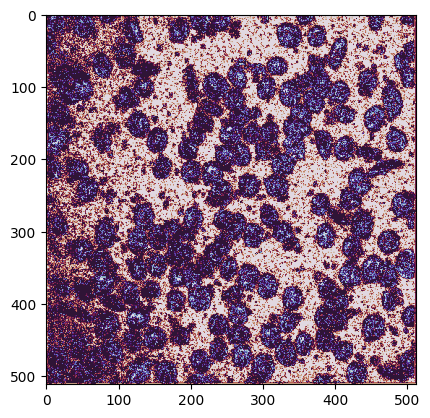

In [168]:
test_img = cv2.imread('/home/lepton/Desktop/anaemia/Anaemia.png', cv2.IMREAD_COLOR)       
test_img = cv2.resize(test_img, (SIZE, SIZE))
test_img = cv2.cvtColor(test_img, cv2.COLOR_RGB2BGR)
test_img = np.expand_dims(test_img, axis=0)

#predict_image = np.expand_dims(X_train[8,:,:,:], axis=0)
X_test_feature = feature_extractor.predict(test_img)
X_test_feature = X_test_feature.reshape(-1, X_test_feature.shape[3])

prediction = model.predict(X_test_feature)

prediction_image = prediction.reshape(512,512)
plt.imshow(prediction_image,cmap="twilight")

print(mask.shape)
prediction.shape

In [169]:
# cv2.imwrite("/home/lepton/Desktop/Anemia_rescaled.tiff",prediction_image)
# sns.imshow(prediction_image)

In [170]:
#plt.imshow(prediction.reshape(512,512))
plt.imsave("/home/lepton/Desktop/Anemia_rescaled.png",prediction_image, cmap="twilight")